In [18]:
import sympy as sp
sp.init_printing(use_latex ='mathjax')

import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import os
import pandas as pd
import scipy as sc
from sklearn.linear_model import LinearRegression
from lmfit import Model
import lmfit
from myheatmap import myheatmap
from tabulate import tabulate

sns.set_context('poster')

In [19]:
## Mac versus PC
mac = False

In [20]:
#Determine amplitude and phase of each resonator for lower and higher frequency modes based on mode map

#Define function to mask mode maps
def maskplot(df, mk, column, uselog=False, cbarlims = None, **kwargs):
    rlogmkname = column + 'logmk'
    rmkname = column + 'mk'
    df[rlogmkname] = np.log10(df[column][mk]) 
    df[rmkname] = df[column][mk]

    if uselog:
        values = rlogmkname
    else:
        values = rmkname
    dfgrid = df.pivot_table(index = 'Green Y', columns = 'Green X', values = values).sort_index(axis = 0, ascending = False)
    ax,cbar = myheatmap(dfgrid, values, return_cbar = True, **kwargs)
    plt.xlabel(u'$x$ (μm)')
    plt.ylabel(u'$y$ (μm)')
    plt.gca().axis('equal')
    return ax, cbar

#Define number of points averaged for amplitude and phase
n_amp = 10
n_phase = 10

Low Average amplitude of R1:  2.1245299999999998e-05
Low Average phase of R1:  2.2789544968
Low Driving Frequency in rad/s: 95289714.57231463


C:\Users\vhorowit\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Low Average amplitude of R2:  3.56246e-05
Low Average phase of R2:  1.7923005449000002
Low Driving Frequency in rad/s: 95289714.57231463


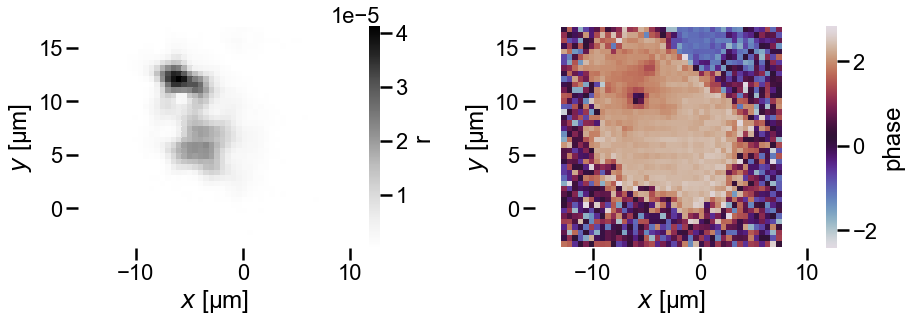

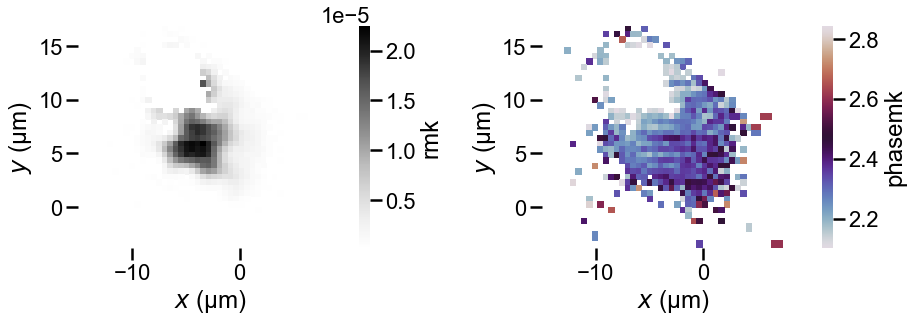

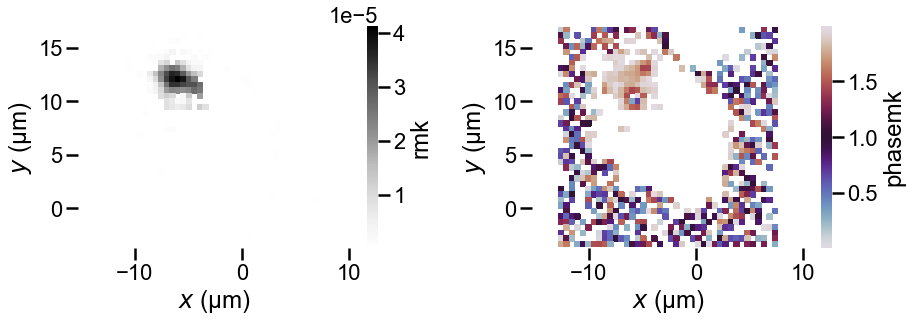

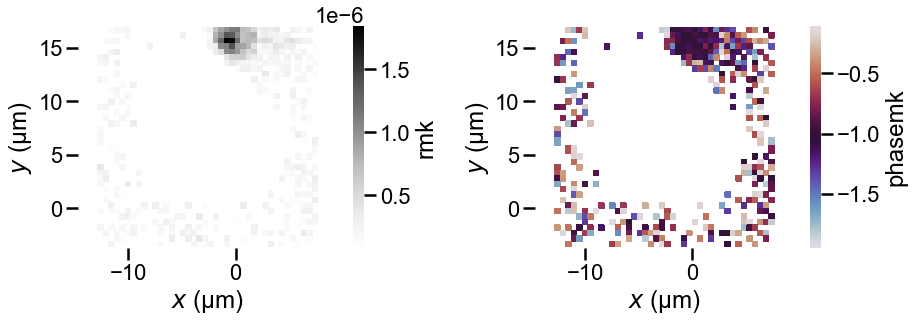

In [21]:
#Plot mode map of lower frequency mode

if mac:
    folder1 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/2019/2019/08/09/'
else:
    folder1 = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample2\2019\2019\08\09'
file1 = 'PosGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2Drum_15.16MHz_1104325' 
path1 = os.path.join(folder1,file1)
df_map1 = pd.read_csv(os.path.join(path1, 'Demod1.csv'), skiprows = 2)
df_map1['w'] = df_map1.frequency * 2 * np.pi
#print(df) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
df_map1['rlog'] = np.log10(df_map1.r) 
amp1 = df_map1.pivot_table(index = 'Green Y', columns = 'Green X', values = 'r').sort_index(axis = 0, ascending = False) 
myheatmap(amp1, 'r', cmap = 'Greys');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.axis('equal')


plt.sca(ax2)
df_map1['rlog'] = np.log10(df_map1.r) 
phase1 = df_map1.pivot_table(index = 'Green Y', columns = 'Green X', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase1, 'phase', cmap='twilight');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
plt.tight_layout();

#Mask only R1

mkpos1 = df_map1.phase > 2.1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map1, mkpos1, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map1, mkpos1, 'phase', cmap = 'twilight')

plt.tight_layout();

#Start table to append driving frequencies, amplitudes and phases
table = [['wDrive', 'R1Amp', 'R1Amp_error', 'R1Phase', 'R1Phase_error', 
          'R2Amp', 'R2Amp_error', 'R2Phase', 'R2Phase_error',
         'R3Amp', 'R3Amp_error', 'R3Phase', 'R3Phase_error']]

#Assign values to variables
d1A1 = df_map1[mkpos1].nlargest(n_amp,['r']).r.mean()
d1p1 = df_map1[mkpos1].nlargest(n_phase,['r']).phase.mean()

d1A1_error = df_map1[mkpos1].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d1p1_error = df_map1[mkpos1].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w1 = df_map1.w[1]

#print data for largest amplitude in masked region
#df_map1.iloc[[df_map1[mkpos1].r.idxmax()]]

#print the average mean and phase of largest 10 data point amplitudes
print('Low Average amplitude of R1: ', d1A1)
print('Low Average phase of R1: ', d1p1)
print('Low Driving Frequency in rad/s:', w1)

#Mask only R2

mkpos2 = (df_map1.phase < 2) & (df_map1.phase > 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map1, mkpos2, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map1, mkpos2, 'phase', cmap = 'twilight')

plt.tight_layout();

#Assign values to variables
d1A2 = df_map1[mkpos2].nlargest(n_amp,['r']).r.mean()
d1p2 = df_map1[mkpos2].nlargest(n_phase,['r']).phase.mean()

d1A2_error = df_map1[mkpos2].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d1p2_error = df_map1[mkpos2].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)


#Mask only R3

mkpos3 = (df_map1.phase < -0.1) & (df_map1.phase > -2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map1, mkpos3, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map1, mkpos3, 'phase', cmap = 'twilight')

plt.tight_layout();

#Assign values to variables
d1A3 = df_map1[mkpos3].nlargest(n_amp,['r']).r.mean()
d1p3 = df_map1[mkpos3].nlargest(n_phase,['r']).phase.mean()

d1A3_error = df_map1[mkpos3].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d1p3_error = df_map1[mkpos3].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)


#Append info to table
table.append([w1, d1A1, d1A1_error, d1p1, d1p1_error, 
              d1A2, d1A2_error, d1p2, d1p2_error,
              d1A3, d1A3_error, d1p3, d1p3_error])

#print the average mean and phase of largest 10 data point amplitudes
print('Low Average amplitude of R2: ', d1A2)
print('Low Average phase of R2: ', d1p2)
print('Low Driving Frequency in rad/s:', w1)

C:\Users\vhorowit\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


High Average amplitude of R1:  6.697299999999999e-06
High Average phase of R1:  -1.7855015493
High Driving Frequency in rad/s: 97452330.02989146
High Average amplitude of R2:  1.8904000000000001e-06
High Average phase of R2:  1.5456690201
High Driving Frequency in rad/s: 97452330.02989146


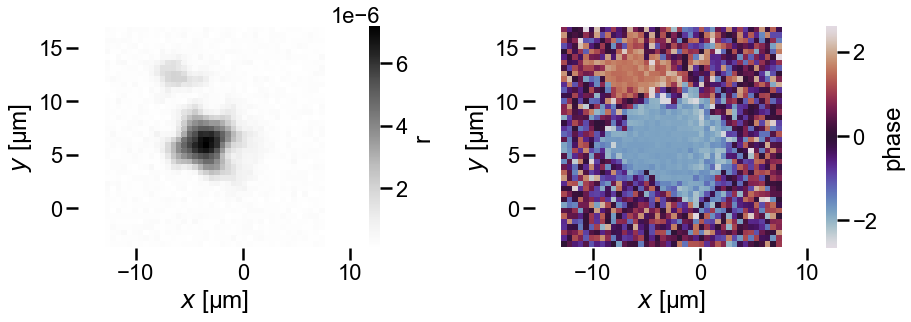

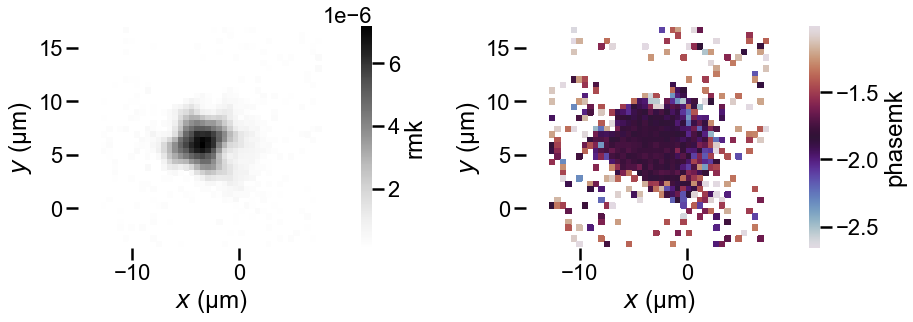

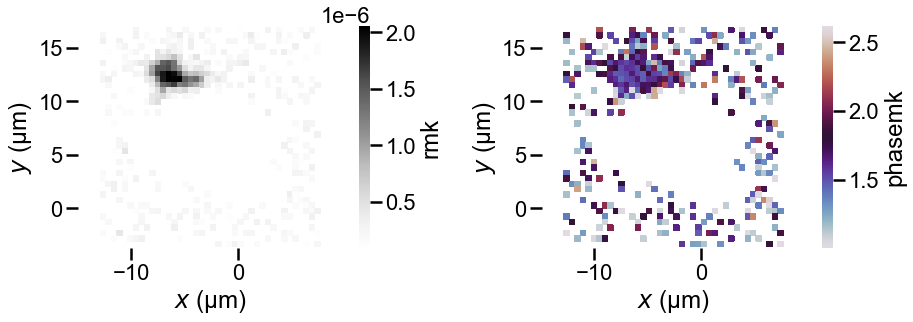

In [22]:
#Plot mode map of lower frequency mode

file2 = 'PosGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2Drum1_15.5MHz105133' 
path2 = os.path.join(folder1,file2)
df_map2 = pd.read_csv(os.path.join(path2, 'Demod1.csv'), skiprows = 2)
df_map2['w'] = df_map2.frequency * 2 * np.pi
#print(df) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
df_map2['rlog'] = np.log10(df_map2.r) 
amp2 = df_map2.pivot_table(index = 'Green Y', columns = 'Green X', values = 'r').sort_index(axis = 0, ascending = False) 
myheatmap(amp2, 'r', cmap = 'Greys');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.axis('equal')


plt.sca(ax2)
df_map2['rlog'] = np.log10(df_map2.r) 
phase2 = df_map2.pivot_table(index = 'Green Y', columns = 'Green X', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase2, 'phase', cmap='twilight');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
plt.tight_layout();

#Mask only R1

mkpos4 = df_map2.phase < -1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map2, mkpos4, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map2, mkpos4, 'phase', cmap = 'twilight')

plt.tight_layout();

#Assign values to variables
d2A1 = df_map2[mkpos4].nlargest(n_amp,['r']).r.mean()
d2p1 = df_map2[mkpos4].nlargest(n_phase,['r']).phase.mean()

d2A1_error = df_map2[mkpos4].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d2p1_error = df_map2[mkpos4].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)

w2 = df_map2.w[1]

#print data for largest amplitude in masked region
#df_map1.iloc[[df_map1[mkpos1].r.idxmax()]]

#print the average mean and phase of largest 10 data point amplitudes
print('High Average amplitude of R1: ', d2A1)
print('High Average phase of R1: ', d2p1)
print('High Driving Frequency in rad/s:', w2)

#Mask only R2

mkpos5 = df_map2.phase > 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

plt.sca(ax1)
maskplot(df_map2, mkpos5, 'r', cmap = 'Greys')

plt.sca(ax2)
maskplot(df_map2, mkpos5, 'phase', cmap = 'twilight')

plt.tight_layout();

#Assign values to variables
d2A2 = df_map2[mkpos5].nlargest(n_amp,['r']).r.mean()
d2p2 = df_map2[mkpos5].nlargest(n_phase,['r']).phase.mean()

d2A2_error = df_map2[mkpos5].nlargest(n_amp,['r']).r.std() / np.sqrt(n_amp)
d2p2_error = df_map2[mkpos5].nlargest(n_phase,['r']).phase.std() / np.sqrt(n_phase)


#Assign values to variables
d2A3 = np.nan
d2p3 = np.nan

d2A3_error = np.nan
d2p3_error = np.nan

#Append info to table
table.append([w2, d2A1, d2A1_error, d2p1, d2p1_error, 
              d2A2, d2A2_error, d2p2, d2p2_error,
              d2A3, d2A3_error, d2p3, d2p3_error])

#print the average mean and phase of largest 10 data point amplitudes
print('High Average amplitude of R2: ', d2A2)
print('High Average phase of R2: ', d2p2)
print('High Driving Frequency in rad/s:', w2)

In [23]:
#Convert table to pandas dataframe

df_vals = pd.DataFrame(table, columns = table[0])
df_vals = df_vals[1:].reset_index(drop = True)

df_vals

,wDrive,R1Amp,R1Amp_error,R1Phase,R1Phase_error,R2Amp,R2Amp_error,R2Phase,R2Phase_error,R3Amp,R3Amp_error,R3Phase,R3Phase_error
0,95289714.572315,0.000021,0.0,2.278954,0.015379,0.000036,0.000001,1.792301,0.009421,0.000001,0.0,-1.028333,0.02224
1,97452330.029891,0.000007,0.0,-1.785502,0.007184,0.000002,0.0,1.545669,0.021904,NaN,NaN,NaN,NaN


In [24]:
#Define column names and read csv file

if mac:
    base1 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/ResonanceCurves/'
else: 
    base1 = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample2\ResonanceCurves'
file1 = os.path.join('Array01.00r0.5p3Device1.2Drum1Couping500','Data.csv')

base2 = base1
file2 = os.path.join('Array01.00r0.5p3Device1.2RandomNodeCoupling500','Data.csv')

path1 = os.path.join(base1, file1)
path2 = os.path.join(base2, file2)

colnames = ['SweepVal', 'F', 'R', 'theta', 'NEP_BW', 'R_ref', 'theta_ref', 'Amp', 'Phase']

df1 = pd.read_csv(path1, names = colnames)
df2 = pd.read_csv(path2, names = colnames)

#Convert to radians
df1['rad'] = df1.theta * np.pi / 180
df2['rad'] = df2.theta * np.pi / 180

#Convert to radians per second
df1['w'] = df1.F * 2 * np.pi 
df2['w'] = df2.F * 2 * np.pi

#Unwrap phase data
df1['unwrap'] = np.unwrap(df1.rad)
df2['unwrap'] = np.unwrap(df2.rad)

#Define amplitudes and phases from mode maps

LA1 = 22*10**-6
Lp1 = 2.3010385

LA2 = 37*10**-6
Lp2 = 1.8086976

LA3 = 1.6*10**-6
Lp3 = -1.03186

HA1 = 7*10**-6
Hp1 = -1.782902

HA2 = 2*10**-6
Hp2 = 1.5791674

w1 = 15.165829099999685*2*np.pi*10**6
w2 = 15.51002004007998*2*np.pi*10**6

In [25]:
#Define all variables

#individual springs that correspond to individual masses
k1 = sp.symbols('k_1')
k2 = sp.symbols('k_2')
k3 = sp.symbols('k_3')

#springs that connect two masses
k12 = sp.symbols('k_12')
k23 = sp.symbols('k_23')

#damping coefficients and forc
g = sp.symbols('g')
 
#masses
m1 = sp.symbols('m1')
m2 = sp.symbols('m2')
m3 = sp.symbols('m3')

#Driving force amplitude
F = sp.symbols('F')

#driving frequency (leave as variable)
wd = sp.symbols('\omega_d')

In [26]:
#Solve for driving amplitudes and phase

#Matrix for complex equations of motion
driven = sp.Matrix([[-wd**2*m1 + 1j*wd*g + k1 + k12, -k12, 0], [-k12, -wd**2*m2 + 
  1j*wd*g + k2 + k12 + k23, -k23],[0, -k23, -wd**2*m3 + 1j*wd*g + k3 + k23]])

#Matrices for Cramer's Rule
driven_m1 = sp.Matrix([[F, -k12, 0], [0, -wd**2*m2 + 
  1j*wd*g + k2 + k12 + k23, -k23],[0, -k23, -wd**2*m3 + 1j*wd*g + k3 + k23]])

driven_m2 = sp.Matrix([[-wd**2*m1 + 1j*wd*g + k1 + k12, F, 0], [-k12, 0, -k23],[0, 0, -wd**2*m3 + 1j*wd*g + k3 + k23]])

driven_m3 = sp.Matrix([[-wd**2*m1 + 1j*wd*g + k1 + k12, -k12, F], [-k12, -wd**2*m2 + 
  1j*wd*2 + k2 + k12 + k23, 0],[0, -k23, 0]])

#Apply Cramer's Rule
Cr1, Cr2, Cr3 = (driven_m1.det()/driven.det(),driven_m2.det()/driven.det(),driven_m3.det()/driven.det())

#Solve for phases for each mass
delta1 = sp.arg(Cr1)
delta2 = sp.arg(Cr2)
delta3 = sp.arg(Cr3)

#Wrap phases for plots

wrap1 = (delta1)%(2*np.pi)
wrap2 = (delta2)%(2*np.pi)
wrap3 = (delta3)%(2*np.pi)

#Solve for amplitude coefficients
amp1 = sp.re(Cr1)/sp.cos(delta1)
amp2 = sp.re(Cr2)/sp.cos(delta2)
amp3 = sp.re(Cr3)/sp.cos(delta3)

In [27]:
#lambdify curves

c1 = sp.lambdify((wd, k1, k2, k3, k12, k23, g, F, m1, m2, m3),amp1)
t1 = sp.lambdify((wd, k1, k2, k3, k12, k23, g, F, m1, m2, m3),wrap1)

c2 = sp.lambdify((wd, k1, k2, k3, k12, k23, g, F, m1, m2, m3 ),amp2)
t2 = sp.lambdify((wd, k1, k2, k3, k12, k23, g, F, m1, m2, m3),wrap2)

c3 = sp.lambdify((wd, k1, k2, k3, k12, k23, g, F, m1, m2, m3),amp3)
t3 = sp.lambdify((wd, k1, k2, k3, k12, k23, g, F, m1, m2, m3),wrap3)

#define functions

def curve1(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3):
     return c1(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3)
    
def theta1(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3):
     return t1(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3) - 2*np.pi
    
def curve2(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3):
     return c2(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3)
    
def theta2(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3):
     return t2(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3) - 2*np.pi
    
def curve3(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3):
     return c3(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3)
    
def theta3(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3):
     return t3(w, k_1, k_2, k_3, k_12, k_23, g_, F_, m_1, m_2, m_3) - 2*np.pi

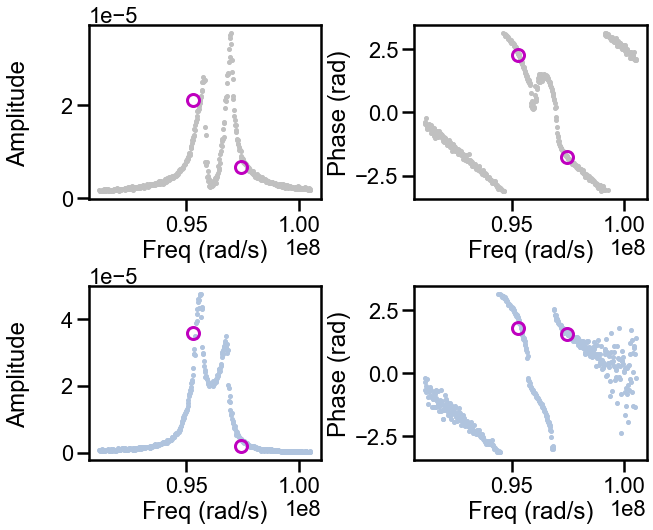

In [28]:
#Slope uncorrected plots

sns.set_context('poster')

m1_col = "#2A4F98"
m2_col = "#E4A52D"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,8))

ax1.plot(df1.w, df1.R, '.', markersize = 8, color = 'silver')
ax1.set_xlabel('Freq (rad/s)')
ax1.set_ylabel('Amplitude\n')

for i in range(df_vals.shape[0]):
    ax1.plot(df_vals.wDrive[i], df_vals.R1Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax2.plot(df1.w, df1.rad, '.', markersize = 8, color = 'silver')
ax2.set_xlabel('Freq (rad/s)')
ax2.set_ylabel('Phase (rad)')

for i in range(df_vals.shape[0]):
    ax2.plot(df_vals.wDrive[i], df_vals.R1Phase[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax3.plot(df2.w, df2.R, '.', markersize = 8, color = 'lightsteelblue')
ax3.set_xlabel('Freq (rad/s)')
ax3.set_ylabel('Amplitude\n')

for i in range(df_vals.shape[0]):
    ax3.plot(df_vals.wDrive[i], df_vals.R2Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax4.plot(df2.w, df2.rad, '.', markersize = 8, color = 'lightsteelblue')
ax4.set_xlabel('Freq (rad/s)')
ax4.set_ylabel('Phase (rad)')

for i in range(df_vals.shape[0]):
    ax4.plot(df_vals.wDrive[i], df_vals.R2Phase[i], 'mo', fillstyle='none', markeredgewidth = 3)

plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

Slope =  -7.528469605004035e-07
Intercept =  68.18159644190929


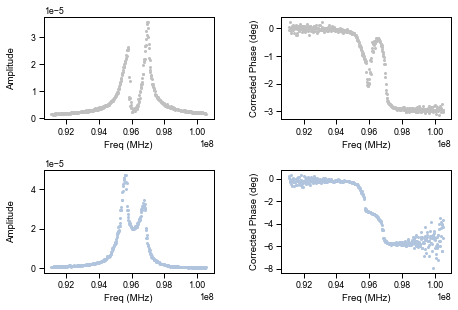

In [29]:
#Fit linear part of phase lag to subtract from graph


#Definte linear portion of less than 15MHz for fit
mk = df1.w < 0.93*10**8
#mk = df1.w < 0.952*10**8

x1 = df1.w[mk]
y1 = df1.unwrap[mk]

x2 = df2.w[mk]
y2 = df2.unwrap[mk]

#Perform linear fit
model1 = lmfit.models.LinearModel()
params1 = model1.make_params(intercept = 0, slope = 0)
result1 = model1.fit(y1, params1, x = x1)

model2 = lmfit.models.LinearModel()
params2 = model2.make_params(intercept = 0, slope = 0)
result2 = model2.fit(y2, params2, x = x2)

#Normalize to R1 phase lag
df1['radLin'] = df1.unwrap - result1.best_values['intercept'] - result1.best_values['slope'] * df1.w
df2['radLin'] = df2.unwrap - result1.best_values['intercept'] - result1.best_values['slope'] * df2.w
slope = result1.best_values['slope']
intercept = result1.best_values['intercept']

#Normalize to average phase lag

avg_slope = (result1.best_values['slope'] + result2.best_values['slope']) / 2
avg_int = (result1.best_values['intercept'] + result2.best_values['intercept']) / 2

#df1['radLin'] = df1.unwrap - avg_int - avg_slope * df1.w
#df2['radLin'] = df2.unwrap - avg_int - avg_slope * df2.w
#slope = avg_slope
#intercept = avg_int

print("Slope = ", slope)
print("Intercept = ", intercept)


#Slope corrected plots

sns.set_context('paper')

m1_col = "#2A4F98"
m2_col = "#E4A52D"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (7.3,4.7))

ax1.plot(df1.w, df1.R, '.', markersize = 4, color = 'silver')
ax1.set_xlabel('Freq (MHz)')
ax1.set_ylabel('Amplitude\n')

ax2.plot(df1.w, df1.radLin, '.', markersize = 4, color = 'silver')
ax2.set_xlabel('Freq (MHz)')
ax2.set_ylabel('Corrected Phase (deg)')

ax3.plot(df2.w, df2.R, '.', markersize = 4, color = 'lightsteelblue')
ax3.set_xlabel('Freq (MHz)')
ax3.set_ylabel('Amplitude\n')

ax4.plot(df2.w, df2.radLin, '.', markersize = 4, color = 'lightsteelblue')
ax4.set_xlabel('Freq (MHz)')
ax4.set_ylabel('Corrected Phase (deg)')

plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

In [30]:
print(lmfit.fit_report(result1))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 101
    # variables        = 2
    chi-square         = 0.82728652
    reduced chi-square = 0.00835643
    Akaike info crit   = -481.277196
    Bayesian info crit = -476.046955
[[Variables]]
    slope:     -7.5285e-07 +/- 1.6518e-08 (2.19%) (init = 0)
    intercept:  68.1815964 +/- 1.52056078 (2.23%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -1.000


In [31]:
#Define function to calculate phase correction and complex amplitudes

phaseCor = []
ampComplex = []

def complexAmp(df, intercept, slope):
    
    #Correct phase with calculated intercept and slope from time delays
    x1 = df['R1Phase'] - (intercept + slope * df['wDrive'])
    x2 = df['R2Phase'] - (intercept + slope * df['wDrive'])
    x3 = df['R3Phase'] - (intercept + slope * df['wDrive'])
    
    #Add corrected phase to table to append to dataframe
    phaseCor.append([x1%(-2*np.pi), x2%(-2*np.pi), x3%(-2*np.pi)])
    
    #Use amplitude and corrected phase to calculate complex amplitude
    Z1 = df['R1Amp'] * np.exp(1j * x1)
    Z2 = df['R2Amp'] * np.exp(1j * x2)
    Z3 = df['R3Amp'] * np.exp(1j * x3)
    
    #Add complex amplitude to table to append to dataframe
    ampComplex.append([Z1, Z2, Z3])


for i in range(df_vals.shape[0]):
    complexAmp(df_vals.iloc[i], intercept, slope)

df_vals['R1PhaseCor'], df_vals['R2PhaseCor'], df_vals['R3PhaseCor'] = np.transpose(phaseCor)
df_vals['R1AmpCom'], df_vals['R2AmpCom'], df_vals['R3AmpCom'] = np.transpose(ampComplex)

df_vals

<ipython-input-31-f4f9a4af9cc1>:14: RuntimeWarning: invalid value encountered in double_scalars
  phaseCor.append([x1%(-2*np.pi), x2%(-2*np.pi), x3%(-2*np.pi)])


,wDrive,R1Amp,R1Amp_error,R1Phase,R1Phase_error,R2Amp,R2Amp_error,R2Phase,R2Phase_error,R3Amp,R3Amp_error,R3Phase,R3Phase_error,R1PhaseCor,R2PhaseCor,R3PhaseCor,R1AmpCom,R2AmpCom,R3AmpCom
0,95289714.572315,0.000021,0.0,2.278954,0.015379,0.000036,0.000001,1.792301,0.009421,0.000001,0.0,-1.028333,0.02224,-0.447255,-0.933909,-3.754543,0.000019-0.000009j,0.000021-0.000029j,-0.000001+0.000001j
1,97452330.029891,0.000007,0.0,-1.785502,0.007184,0.000002,0.0,1.545669,0.021904,NaN,NaN,NaN,NaN,-2.883593,-5.835608,NaN,-0.000006-0.000002j,0.000002+0.000001j,N00000000a00000000N


In [32]:
#Singular Value Decomposition

#Definte data

x1 = df1.F.values * 2 * np.pi
y1 = df1.R.values
th1 = df1.radLin.values

x2 = df2.F.values * 2 * np.pi
y2 = df2.R.values
th2 = df2.radLin.values

w1 = vals1['wDrive']
LZ1 = vals1['R1AmpCom']
LZ2 = vals1['R2AmpCom']
LZ3 = vals1['R3AmpCom']

w2 = vals2['wDrive']
HZ1 = vals2['R1AmpCom']
HZ2 = vals2['R2AmpCom']


#Define Matrix M
M = np.array([[-w1**2*np.real(LZ1), -w1*np.imag(LZ1), np.real(LZ1), 0, 0, np.real(LZ1)-np.real(LZ2), 0, -1], 
              [-w1**2*np.imag(LZ1), w1*np.real(LZ1), np.imag(LZ1), 0, 0, np.imag(LZ1)-np.imag(LZ2), 0, 0], 
              [-w1**2*np.real(LZ2)/4, -w1*np.imag(LZ2), 0, np.real(LZ2), 0, np.real(LZ2)-np.real(LZ1), np.real(LZ2)-np.real(LZ3), 0],
              [-w1**2*np.imag(LZ2)/4, w1*np.real(LZ2), 0, np.imag(LZ2), 0, np.imag(LZ2)-np.imag(LZ1), np.imag(LZ2)-np.imag(LZ3), 0],
              [-w1**2*np.real(LZ3), -w1*np.imag(LZ3), 0, 0, np.real(LZ3), 0, np.real(LZ3)-np.real(LZ2), 0],
              [-w1**2*np.imag(LZ3), w1*np.real(LZ3), 0, 0, np.imag(LZ3), 0, np.imag(LZ3)-np.imag(LZ2), 0],
              [-w2**2*np.real(HZ1), -w2*np.imag(HZ1), np.real(HZ1), 0, 0, np.real(HZ1)-np.real(HZ2), 0, -1], 
              [-w2**2*np.imag(HZ1), w2*np.real(HZ1), np.imag(HZ1), 0, 0, np.imag(HZ1)-np.imag(HZ2), 0, 0]])


#SVD
u, s, vh = np.linalg.svd(M, full_matrices = True)

NameError: name 'vals2' is not defined

In [ ]:
s

In [ ]:
vh

In [ ]:
#[M1, M2, G1, G2, K1, K2, K12, FD] = np.matrix.transpose(vh)[7]
[M, G, K1, K2, K3, K12, K23, FD] = vh[7]

vals = [['m', 'g', 'k1', 'k2', 'k3', 'k12','k23', 'F']]
vals.append((M, G, K1, K2, K3, K12, K23, FD))

print(tabulate(vals, headers = 'firstrow', tablefmt = 'fancy_grid'))

In [ ]:
#Plots of spectra data vs. curve with inputs

sns.set_context('poster')

m1_col = "#2A4F98"
m2_col = "#E4A52D"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,11))

ax1.plot(x1, y1, '.', markersize = 10, color = 'silver')
ax1.plot(x1, curve1(x1, K1, K2, K3, K12, K23, G, FD, M, M/4, M), '--', color='black', linewidth = 3)
ax1.set_xlabel('Freq (rad/s)')
ax1.set_ylabel('Amplitude\n')
ax1.set_title('Amplitude of R1')

for i in range(df_vals.shape[0]):
    ax1.plot(df_vals.wDrive[i], df_vals.R1Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax2.plot(x1, th1, '.', markersize = 10, color = 'silver')
ax2.plot(x1, theta1(x1, K1, K2, K3, K12, K23, G, FD, M, M/4, M), '--', color='black', linewidth = 3)
ax2.set_xlabel('Freq (rad/s)')
ax2.set_ylabel('Phase (rad)')
ax2.set_title('Phase of R1')

for i in range(df_vals.shape[0]):
    ax2.plot(df_vals.wDrive[i], df_vals.R1PhaseCor[i] % (-2 * np.pi), 'mo', fillstyle='none', markeredgewidth = 3)

ax3.plot(x2, y2, '.', markersize = 10, color = 'lightsteelblue')
ax3.plot(x2, curve2(x1, K1, K2, K3, K12, K23, G, FD, M, M/4, M), '--', color='black', linewidth = 3)
ax3.set_xlabel('Freq (rad/s)')
ax3.set_ylabel('Amplitude\n')
ax3.set_title('Amplitude of R2')

for i in range(df_vals.shape[0]):
    ax3.plot(df_vals.wDrive[i], df_vals.R2Amp[i], 'mo', fillstyle='none', markeredgewidth = 3)

ax4.plot(x2, th2, '.', markersize = 10, color = 'lightsteelblue')
ax4.plot(x2, theta2(x1, K1, K2, K3, K12, K23, G, FD, M, M/4, M), '--', color='black', linewidth = 3)
ax4.set_xlabel('Freq (rad/s)')
ax4.set_ylabel('Phase (rad)')
ax4.set_title('Phase of R2')

for i in range(df_vals.shape[0]):
    ax4.plot(df_vals.wDrive[i], df_vals.R2PhaseCor[i] % (-2 * np.pi), 'mo', fillstyle='none', markeredgewidth = 3)

plt.subplots_adjust(hspace = 0.5, wspace = 0.4)